In [1]:
!pip install facenet_pytorch
!pip install scikit-image
!pip install opencv-python
!apt install libgl1-mesa-glx

     |████████████████████████████████| 1.9 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 776.8 MB 16 kB/s s eta 0:00:01     |████████████████▌               | 401.6 MB 10.5 MB/s eta 0:00:36
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 12.4 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 148 kB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 9.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
import cv2
from os import makedirs, listdir
from os.path import join, exists
import glob

from facenet_pytorch import MTCNN
from PIL import Image

from skimage.io import imsave
import imageio.core.util
import torch

In [ ]:
def ignore_warnings(*args, **kwargs):
    pass
imageio.core.util._precision_warn = ignore_warnings

In [ ]:
evaluate_videos_folder = ["evaluate_videos/0", "evaluate_videos/1"]

In [ ]:
for folder in evaluate_videos_folder:
    videos_path = glob.glob(join(folder, "*.mp4"))
    folder = folder.split("/")[1]

    counter = 0
    for video_path in videos_path:
        cap = cv2.VideoCapture(video_path)
        vid = video_path.split("/")[-1]
        vid = vid.split(".")[0]
        frameRate = cap.get(5)  # frame rate

        if not exists("evaluate_videos/frames/" + folder + "/video_" + str(int(counter))):
            makedirs("evaluate_videos/frames/" + folder + "/video_" + str(int(counter)))

        while cap.isOpened():
            frameId = cap.get(1)  # current frame number
            ret, frame = cap.read()
            if not ret:
                break

            filename = (
                "evaluate_videos/frames/"
                + folder
                + "/video_"
                + str(int(counter))
                + "/image_"
                + str(int(frameId) + 1)
                + ".jpg"
            )
            cv2.imwrite(filename, frame)

        cap.release()

        print("Number of videos done:", counter)
        counter += 1

In [ ]:
mtcnn = MTCNN(
    margin=40,
    select_largest=False,
    post_process=False,
    device="cuda"
)

In [ ]:
source_frames_folders = ["/evaluate_videos/frames/0", "/evaluate_videos/frames/0"]
dest_frames_folders = ["/evaluate_videos/faces/0", "/evaluate_videos/faces/1"]

In [ ]:
for i, d in zip(source_frames_folders, dest_frames_folders):
    counter = 0
    for j in listdir(i):
        imgs = glob.glob(join(i, j, "*.jpg"))
        if counter % 10 == 0:
            print("Number of videos done:", counter)
        if exists(join(d, j)):
            counter += 1
            continue
        else:
            makedirs(join(d, j))
        for k in imgs:
            frame = cv2.imread(k)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = Image.fromarray(frame)
            try:
                face = mtcnn(frame)
            except TypeError:
                print("No image found in ", j ,"th video")
        
            else:
                try:
                    imsave(
                        join(d, j, k.split("/")[-1]),
                        face.permute(1, 2, 0).int().numpy(),
                        check_contrast=False
                    )
                except AttributeError:
                    print("Image skipping")
        counter += 1

In [2]:
pwd

'/scratch/ysolanki/SiameseAkash/deepfakes_video_classification'

In [3]:
cd /raid

/raid


In [4]:
ls

Data/             cache/                imagenette2-320/     lost+found/
PatternNet/       change_detection/     imagenette2-320.tgz  refinex/
PatternNet.zip    change_detection_sp/  inria/               severstal/
atlas/            graveyard/            jibin/               test/
audio_detection/  iitb-apps/            levir/


In [5]:
cd Da

[Errno 2] No such file or directory: 'Da'
/raid


In [6]:
cd Data/ata

[Errno 2] No such file or directory: 'Data/ata'
/raid


In [15]:
cd /raid/Data

/raid/Data


In [17]:
cd Master_Dataset_Elvin_Mrunal/

/raid/Data/Master_Dataset_Elvin_Mrunal


In [18]:
ls

Facebook_created_dataset_Face_extracted_Real+Fake/
Facebook_created_dataset_Face_extracted_Real+Fake_Small/
Google+FaceForensics+Facebook_created_dataset_Face_extracted_Real+Fake/
Google+FaceForensics_created_dataset_Face_extracted_Real+Fake/
Google_created_dataset_Face_extracted_Real+Fake/
Untitled.ipynb
face_forensics_created_dataset_Face_extracted/
face_forensics_created_dataset_Face_extracted_Fake_All_Mix/
mrunal/
youtube_created_dataset_Face_extracted_Real/


In [19]:
cd Facebook_created_dataset_Face_extracted_Real+Fake/

/raid/Data/Master_Dataset_Elvin_Mrunal/Facebook_created_dataset_Face_extracted_Real+Fake


In [20]:
ls

test/  train/  validation/


In [21]:
cd train/

/raid/Data/Master_Dataset_Elvin_Mrunal/Facebook_created_dataset_Face_extracted_Real+Fake/train


In [23]:
cd real

/raid/Data/Master_Dataset_Elvin_Mrunal/Facebook_created_dataset_Face_extracted_Real+Fake/train/real


In [24]:
ls

0.jpg       144070.jpg  188906.jpg  232889.jpg  277003.jpg  55967.jpg
1.jpg       144071.jpg  188907.jpg  23289.jpg   277004.jpg  55968.jpg
10.jpg      144072.jpg  188908.jpg  232890.jpg  277005.jpg  55969.jpg
100.jpg     144073.jpg  188909.jpg  232891.jpg  277006.jpg  5597.jpg
1000.jpg    144074.jpg  18891.jpg   232892.jpg  277007.jpg  55970.jpg
10000.jpg   144075.jpg  188910.jpg  232893.jpg  277008.jpg  55971.jpg
100000.jpg  144076.jpg  188911.jpg  232894.jpg  277009.jpg  55972.jpg
100001.jpg  144077.jpg  188912.jpg  232895.jpg  27701.jpg   55973.jpg
100002.jpg  144078.jpg  188913.jpg  232896.jpg  277010.jpg  55974.jpg
100003.jpg  144079.jpg  188914.jpg  232897.jpg  277011.jpg  55975.jpg
100004.jpg  14408.jpg   188915.jpg  232898.jpg  277012.jpg  55976.jpg
100005.jpg  144080.jpg  188916.jpg  232899.jpg  277013.jpg  55977.jpg
100006.jpg  144081.jpg  188917.jpg  2329.jpg    277014.jpg  55978.jpg
100007.jpg  144082.jpg  188918.jpg  23290.jpg   277015.jpg  55979.jpg
100008.jpg  144083.jp

101282.jpg  145357.jpg  190193.jpg  234174.jpg  278290.jpg  57298.jpg
101283.jpg  145358.jpg  190194.jpg  234175.jpg  278291.jpg  57299.jpg
101284.jpg  145359.jpg  190195.jpg  234176.jpg  278292.jpg  573.jpg
101285.jpg  14536.jpg   190196.jpg  234177.jpg  278293.jpg  5730.jpg
101286.jpg  145360.jpg  190197.jpg  234178.jpg  278294.jpg  57300.jpg
101287.jpg  145361.jpg  190198.jpg  234179.jpg  278295.jpg  57301.jpg
101288.jpg  145362.jpg  190199.jpg  23418.jpg   278296.jpg  57302.jpg
101289.jpg  145363.jpg  1902.jpg    234180.jpg  278297.jpg  57303.jpg
10129.jpg   145364.jpg  19020.jpg   234181.jpg  278298.jpg  57304.jpg
101290.jpg  145365.jpg  190200.jpg  234182.jpg  278299.jpg  57305.jpg
101291.jpg  145366.jpg  190201.jpg  234183.jpg  2783.jpg    57306.jpg
101292.jpg  145367.jpg  190202.jpg  234184.jpg  27830.jpg   57307.jpg
101293.jpg  145368.jpg  190203.jpg  234185.jpg  278300.jpg  57308.jpg
101294.jpg  145369.jpg  190204.jpg  234186.jpg  278301.jpg  57309.jpg
101295.jpg  14537.jpg  

104711.jpg  148893.jpg  193617.jpg  237605.jpg  28171.jpg   60752.jpg
104712.jpg  148894.jpg  193618.jpg  237606.jpg  281710.jpg  60753.jpg
104713.jpg  148895.jpg  193619.jpg  237607.jpg  281711.jpg  60754.jpg
104714.jpg  148896.jpg  19362.jpg   237608.jpg  281712.jpg  60755.jpg
104715.jpg  148897.jpg  193620.jpg  237609.jpg  281713.jpg  60756.jpg
104716.jpg  148898.jpg  193621.jpg  23761.jpg   281714.jpg  60757.jpg
104717.jpg  148899.jpg  193622.jpg  237610.jpg  281715.jpg  60758.jpg
104718.jpg  1489.jpg    193623.jpg  237611.jpg  281716.jpg  60759.jpg
104719.jpg  14890.jpg   193624.jpg  237612.jpg  281717.jpg  6076.jpg
10472.jpg   148900.jpg  193625.jpg  237613.jpg  281718.jpg  60760.jpg
104720.jpg  148901.jpg  193626.jpg  237614.jpg  281719.jpg  60761.jpg
104721.jpg  148902.jpg  193627.jpg  237615.jpg  28172.jpg   60762.jpg
104722.jpg  148903.jpg  193628.jpg  237616.jpg  281720.jpg  60763.jpg
104723.jpg  148904.jpg  193629.jpg  237617.jpg  281721.jpg  60764.jpg
104724.jpg  148905.jp

107947.jpg  152383.jpg  196901.jpg  240959.jpg  285048.jpg  64042.jpg
107948.jpg  152384.jpg  196902.jpg  24096.jpg   285049.jpg  64043.jpg
107949.jpg  152385.jpg  196903.jpg  240960.jpg  28505.jpg   64044.jpg
10795.jpg   152386.jpg  196904.jpg  240961.jpg  285050.jpg  64045.jpg
107950.jpg  152387.jpg  196905.jpg  240962.jpg  285051.jpg  64046.jpg
107951.jpg  152388.jpg  196906.jpg  240963.jpg  285052.jpg  64047.jpg
107952.jpg  152389.jpg  196907.jpg  240964.jpg  285053.jpg  64048.jpg
107953.jpg  15239.jpg   196908.jpg  240965.jpg  285054.jpg  64049.jpg
107954.jpg  152390.jpg  196909.jpg  240966.jpg  285055.jpg  6405.jpg
107955.jpg  152391.jpg  19691.jpg   240967.jpg  285056.jpg  64050.jpg
107956.jpg  152392.jpg  196910.jpg  240968.jpg  285057.jpg  64051.jpg
107957.jpg  152393.jpg  196911.jpg  240969.jpg  285058.jpg  64052.jpg
107958.jpg  152394.jpg  196912.jpg  24097.jpg   285059.jpg  64053.jpg
107959.jpg  152395.jpg  196913.jpg  240970.jpg  28506.jpg   64054.jpg
10796.jpg   152396.jp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



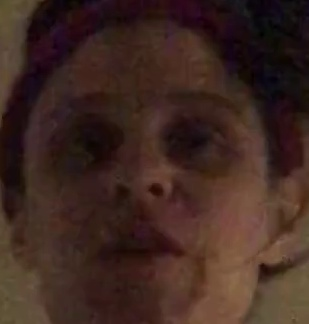

In [26]:
from IPython.display import Image
Image('0.jpg')

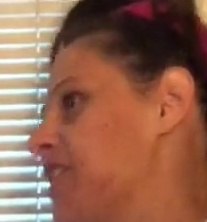

In [31]:
from IPython.display import Image
Image('../fake/370.jpg')

In [37]:
import os
import shutil

abs_src_folder = "/raid/Data/Master_Dataset_Elvin_Mrunal/Facebook_created_dataset_Face_extracted_Real+Fake/train"
src_folders = [abs_src_folder + "/fake/", abs_src_folder + "/real/"]

abs_dest_folder = "/scratch/ysolanki/SiameseAkash/deepfakes_video_classification/evaluate_fb"
dest_folders = [abs_dest_folder + "/0/", abs_dest_folder + "/1/"]

    
for (src_folder, dest_folder) in zip(src_folders, dest_folders):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    for img in os.listdir(src_folder)[:1000]:
        shutil.copy(src_folder + img, dest_folder + img)